In [ ]:
pip install numpy pandas scikit-learn matplotlib

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
data = {
    'StudyHours': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Pass': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]  # 0 = Fail, 1 = Pass
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the data
print(df.head())

   StudyHours  Pass
0           1     0
1           2     0
2           3     0
3           4     0
4           5     0


In [3]:
# Features (X) and Target (y)
X = df[['StudyHours']]  # Feature(s)
y = df['Pass']          # Target variable (0 = Fail, 1 = Pass)

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Testing data: {X_test.shape}, {y_test.shape}")

Training data: (8, 1), (8,)
Testing data: (2, 1), (2,)


In [4]:
# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Display the model's learned coefficients
print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: [-6.28507357]
Coefficient: [1.14274212]


In [5]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Display the predictions
print("Predicted Outcomes (Pass/Fail):", y_pred)
print("Actual Outcomes:", y_test.values)

Predicted Outcomes (Pass/Fail): [1 0]
Actual Outcomes: [1 0]


In [6]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Generate classification report
class_report = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[1 0]
 [0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


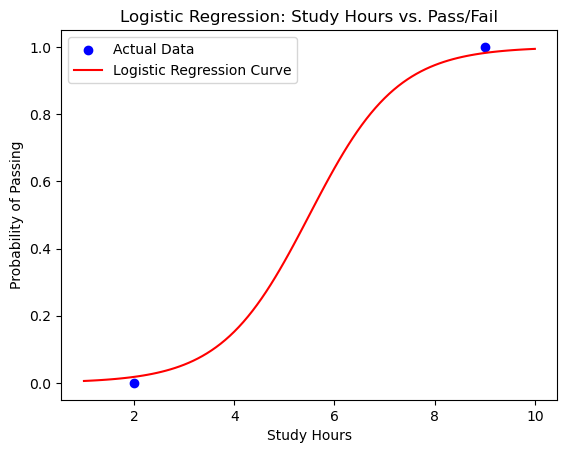

In [7]:
# Create a range of study hours for plotting
study_hours_range = np.linspace(X.min(), X.max(), 100)

# Calculate predicted probabilities using the sigmoid function
y_prob = model.predict_proba(study_hours_range.reshape(-1, 1))[:, 1]

# Plot the actual data points
plt.scatter(X_test, y_test, color='blue', label='Actual Data')

# Plot the logistic regression curve
plt.plot(study_hours_range, y_prob, color='red', label='Logistic Regression Curve')

# Add labels and title
plt.xlabel('Study Hours')
plt.ylabel('Probability of Passing')
plt.title('Logistic Regression: Study Hours vs. Pass/Fail')
plt.legend()

# Show the plot
plt.show()